# Predicting the Sale Price of Bulldozers using machine Learning

In this norebook, i am going to go through machine learning project with the goal of predicting the sale price of the bulldozer.

## 1. Problem defination

>Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.

## 2. Data

The data is downloaded from the kaggle Bluebook for Bulldozers competition:
https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main Datasets: 
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evalution of this project check:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note :** The goal fro most regression evalution metrics is to minimize the error. 

## 4. Features

Kaggle provides a data dictionary detailing all the of the features of the dataset. You can view this data this data dictionary here: https://www.kaggle.com/c/bluebook-for-bulldozers/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Import training and validation sets
df=pd.read_csv("data/TrainAndValid.csv",low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

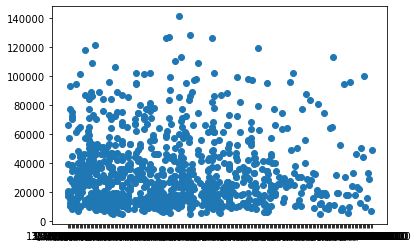

In [5]:
plt.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

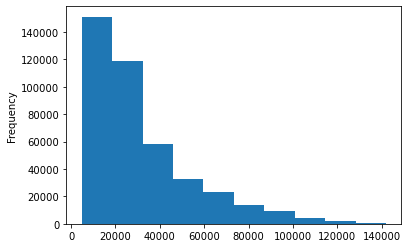

In [6]:
df.SalePrice.plot.hist()

### Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible

In [7]:
#import data agian  but this time parse dates
df=pd.read_csv("data/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [8]:
df.saledate.dtype

dtype('<M8[ns]')

In [9]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

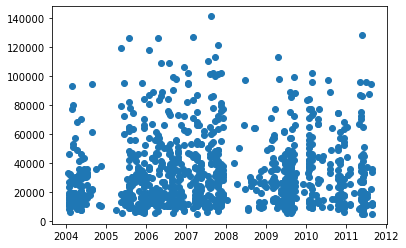

In [10]:
plt.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

Text(0, 0.5, 'Number of sales')

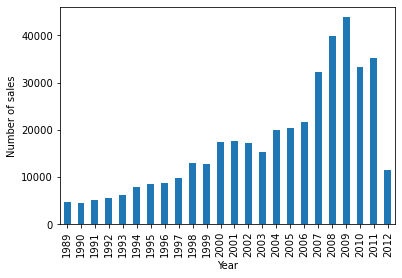

In [11]:
df.saledate.dt.year.value_counts().sort_index().plot.bar()
plt.xlabel("Year")
plt.ylabel("Number of sales")

In [12]:
import seaborn as sns

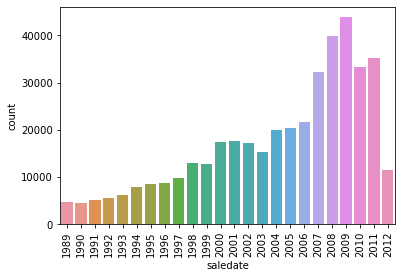

In [13]:
sns.countplot(df.saledate.dt.year)
plt.xticks(rotation=90);

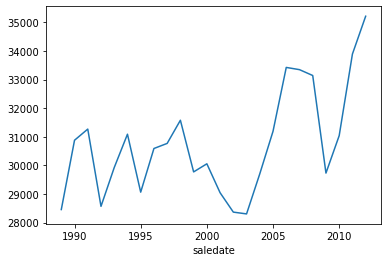

In [14]:
df.groupby(df.saledate.dt.year).mean()["SalePrice"].plot()

In [15]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [17]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate
When workin gwith tim series data, it's good idea to sort it by date

In [18]:
#Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True)

In [19]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

#### Make a copy of the origianal DataFrame
cause when we manipulate the copy,we've still got our original data

In [20]:
#Make a copy
df_temp=df.copy()

### Add datetime parameters for 'saledate' columd

In [21]:
df_temp["saleYear"]=df_temp["saledate"].dt.year
df_temp["saleDay"]=df_temp["saledate"].dt.day
df_temp["saleMonth"]=df_temp["saledate"].dt.month
df_temp["saleDayOfWeek"]=df_temp["saledate"].dt.dayofweek
df_temp["saleDayOfYear"]=df_temp["saledate"].dt.dayofyear

In [22]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleDay,saleMonth,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,17,1,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,31,1,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,31,1,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,31,1,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,31,1,1,31


In [23]:
#Now we've enriches our DatFrame with date time features, we can remove saledate column
df_temp.drop("saledate",axis=1,inplace=True)

In [24]:
#Check the value of diffrent columns
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Converting string to categorical

In [25]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

True

In [26]:
#This will turn all of the string values into category values
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype("category").cat.as_ordered()

In [27]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [28]:
df_temp.state

205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: category
Categories (53, object): [Alabama < Alaska < Arizona < Arkansas ... Washington DC < West Virginia < Wisconsin < Wyoming]

In [29]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [30]:
#Check missing data
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Save preprocessed data

In [31]:
df_temp.to_csv("data/train_temp.csv",index=False)

In [32]:
df_temp=pd.read_csv("data/train_temp.csv",low_memory=False)

In [33]:
df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleDay,saleMonth,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,17,1,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,31,1,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,31,1,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,31,1,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,31,1,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,28,4,5,119
412694,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,2012,28,4,5,119
412695,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,2012,28,4,5,119
412696,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,2012,28,4,5,119


## FIll missing values

### Fill numerical missing values first

In [34]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleDay
saleMonth
saleDayOfWeek
saleDayOfYear


In [35]:
#Check for which numeric columns have null values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isnull().sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [36]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isnull().sum():
            #add a binary coulumns which tells us if hte data was missing 
            df_temp[label+"_is_missing"]=content.isnull()
            #fill missing numeric values with median
            df_temp[label]=content.fillna(content.median())

In [37]:
#Check for which numeric columns have null values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isnull().sum():
            print(label)

In [38]:
df_temp["auctioneerID_is_missing"].value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [39]:
df_temp.isnull().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Fillin and turning categorical varibels into number

In [40]:
#check for columns which are not numericals
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [41]:
#turn categorical variables into number and fill missing
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add binary columns to indicate whether sample had missing value
        df_temp[label+"_is_missing"]=content.isnull()
        #turn categories into number and add +1
        df_temp[label]=pd.Categorical(content).codes+1
        #plus 1 because null value is assign as -1.... we dont want negative number

In [42]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [43]:
df_temp.isnull().sum().sum()

0

In [44]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build machine learning model

## 5. Modelling

In [45]:
#Split data into training adn validation
df_val=df_temp[df_temp.saleYear==2012]
df_train=df_temp[df_temp.saleYear!=2012]

In [46]:
#Split data into X & y
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice
X_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val.SalePrice

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error,mean_absolute_error

In [48]:
#Create evalution function
def RMSLE(y_test,y_pred):
    "Calculates root mean squared log error between prediction and true labels"
    return np.sqrt(mean_squared_log_error(y_test,y_pred))

def show_scores(model):
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_valid)
    scores={"training MAE":mean_absolute_error(y_train,train_pred),
            "Valid MAE" : mean_absolute_error(y_valid,val_pred),
            "Training RMSLE":RMSLE(y_train,train_pred),
            "Valid RMSLE":RMSLE(y_valid,val_pred),
            "Train R2 score": model.score(X_train,y_train),
            "valid R2 score": model.score(X_valid,y_valid)}
    return scores

In [49]:
model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)

In [50]:
%%time 
#instantiate model
model.fit(X_train,y_train)

Wall time: 15.6 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [51]:
#Score the model
show_scores(model)

{'training MAE': 5562.079819856652,
 'Valid MAE': 7178.695028082606,
 'Training RMSLE': 0.2577376357095064,
 'Valid RMSLE': 0.2933375745468615,
 'Train R2 score': 0.8605891310325422,
 'valid R2 score': 0.8315394436192207}

### Hyperparameter tuning with RandomizedSearchCV

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#Different randomforestRegressor hyperparameters
param_distributions={"n_estimators":np.arange(10,100,10),
                      "max_depth":[None,3,5,10],
                      "min_samples_split":np.arange(2,20,2),
                      "min_samples_leaf":np.arange(1,20,2),
                      "max_features":[0.5,1,"sqrt","auto"],
                      "max_samples":[10000]}

#Instantiate RandomizedSearchCV model
Rs_model=RandomizedSearchCV(RandomForestRegressor(),
                           param_distributions=param_distributions,
                           random_state=42,
                           n_jobs=-1,
                           verbose=True,
                           n_iter=100,
                           cv=5)

#Fit RandomizedSearchCV model
Rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  2.0min remaining:  1.3min


In [ ]:
Rs_model.best_score_

In [ ]:
Rs_model.best_params_

In [ ]:
Rs_model.cv_results_

In [ ]:
#Evaluate the randomized model
show_scores(Rs_model)

### Train a model with best hyperparameters
**Note**: These are found afther 100 iteration of randomizedSearchCV

In [52]:
%%time

#Most ideal hyperparamters
ideal_model=RandomForestRegressor(n_estimators=40,
                                  min_samples_leaf=1,
                                  min_samples_split=14,
                                  max_features=0.5,
                                  n_jobs=-1,
                                  random_state=42,
                                  max_samples=None)

#Fit the ideal model
ideal_model.fit(X_train,y_train)

Wall time: 1min 14s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [53]:
show_scores(ideal_model)

{'training MAE': 2955.983933299897,
 'Valid MAE': 5964.177153673459,
 'Training RMSLE': 0.14458146009839043,
 'Valid RMSLE': 0.2472885722338778,
 'Train R2 score': 0.9587327618460258,
 'valid R2 score': 0.8811250314619335}

## Make prediction on test data

In [58]:
#import the test data
df_test=pd.read_csv("data/Test.csv",low_memory=False,parse_dates=["saledate"])

## Preprocessing the data

In [59]:
def preprocess_data(df):
    """
    perform transformation on df and returns transfromed df.
    """
    df["saleYear"]=df["saledate"].dt.year
    df["saleDay"]=df["saledate"].dt.day
    df["saleMonth"]=df["saledate"].dt.month
    df["saleDayOfWeek"]=df["saledate"].dt.dayofweek
    df["saleDayOfYear"]=df["saledate"].dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)
    
    
    #This will turn all of the string values into category values
    for label,content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label]=content.astype("category").cat.as_ordered()
            
    #Fill teh numeric rows with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if content.isnull().sum():
                #add a binary coulumns which tells us if hte data was missing 
                df[label+"_is_missing"]=content.isnull()
                #fill missing numeric values with median
                df[label]=content.fillna(content.median())
            
        #fill categorical missing data and turned categories into numbers 
        if not pd.api.types.is_numeric_dtype(content):
            df[label+ "_is_missing"]=content.isnull()
            df[label]=pd.Categorical(content).codes+1
                
    return df

In [60]:
#process test data
df_test = preprocess_data(df_test)

In [61]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [62]:
#we  can find how the columns differ using sets
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [63]:
#Manually adjust df_test to have auctioneerID_is_missing column
df_test['auctioneerID_is_missing']=False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally now our test dataset has same feature as our trainging dataframe,we can make prediction

In [64]:
test_pred=ideal_model.predict(df_test)

In [65]:
#format prediction into same format Kaggle is after
df_pred=pd.DataFrame()
df_pred["SalesID"]=df_test["SalesID"]
df_pred["SalePrice"]=test_pred
df_pred

,SalesID,SalePrice
0,1227829,20182.963037
1,1227844,20991.099298
2,1227847,53577.173160
3,1227848,64154.683943
4,1227863,43954.271415
...,...,...
12452,6643171,46680.303155
12453,6643173,16689.072466
12454,6643184,13239.574413
12455,6643186,19539.491539


In [66]:
df_pred.to_csv("data/test_prediction.csv")

### Feature Importance

Feature importance seeks to figure out which different attributes of data were most importance when predicting the **target variable** (SalePrice)

In [67]:
#Find feature importance of our model
ideal_model.feature_importances_

array([3.46371834e-02, 1.80631866e-02, 4.27360326e-02, 2.03905687e-03,
       3.39063451e-03, 2.12254263e-01, 3.07558167e-03, 1.05487170e-03,
       4.42811073e-02, 4.35401448e-02, 6.25353419e-02, 4.41536443e-03,
       1.18869574e-02, 1.50988687e-01, 4.48795135e-02, 5.96648736e-03,
       1.77364385e-03, 3.72694798e-03, 3.46998320e-03, 5.67605489e-02,
       5.08396831e-04, 9.98095061e-05, 9.85707343e-04, 1.50875370e-04,
       1.44981268e-03, 2.27782518e-05, 3.96921988e-03, 4.20795278e-03,
       3.48080236e-04, 2.27476328e-03, 3.44743709e-03, 2.17294008e-03,
       3.29471304e-03, 3.98967510e-04, 2.22358674e-03, 3.98956065e-03,
       7.52498277e-04, 1.31281701e-02, 1.51398146e-03, 7.80634713e-06,
       1.16577661e-03, 8.90987127e-04, 4.58377231e-03, 5.56066934e-04,
       4.68787219e-04, 3.67129501e-04, 3.25440612e-04, 2.33250847e-03,
       1.07076434e-03, 3.90806119e-04, 6.06706316e-04, 7.24043399e-02,
       5.64686395e-03, 3.76470362e-03, 2.94399778e-03, 9.83332120e-03,
      

In [101]:
#helper function to plotting feature importance
def plot_fetures(columns,importances,n=20):
    df=(pd.DataFrame({"features":columns,
                      "feature_importances":importances})
        .sort_values("feature_importances",ascending=False))
    
    #plot the dataframe
    fig, ax=plt.subplots(figsize=(10,5))
    ax.barh(df["features"][:n],df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

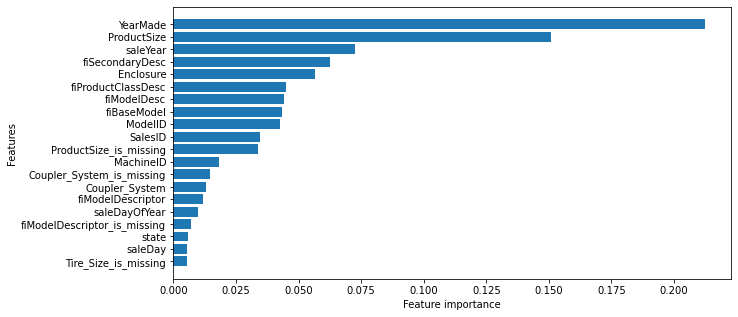

In [102]:
plot_fetures(X_train.columns,ideal_model.feature_importances_)